In [0]:
## Data loading, processing and for more
import pandas as pd
from imblearn.over_sampling import SMOTE

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# set seaborn style because it prettier
sns.set()

## Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix 

## Models

from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

# ignore warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from time import time

%matplotlib inline

In [0]:
df = pd.read_csv("train.csv")

In [0]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [0]:
numeric_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']
cat_ord_columns = ['type', 'nameOrig', 'nameDest']

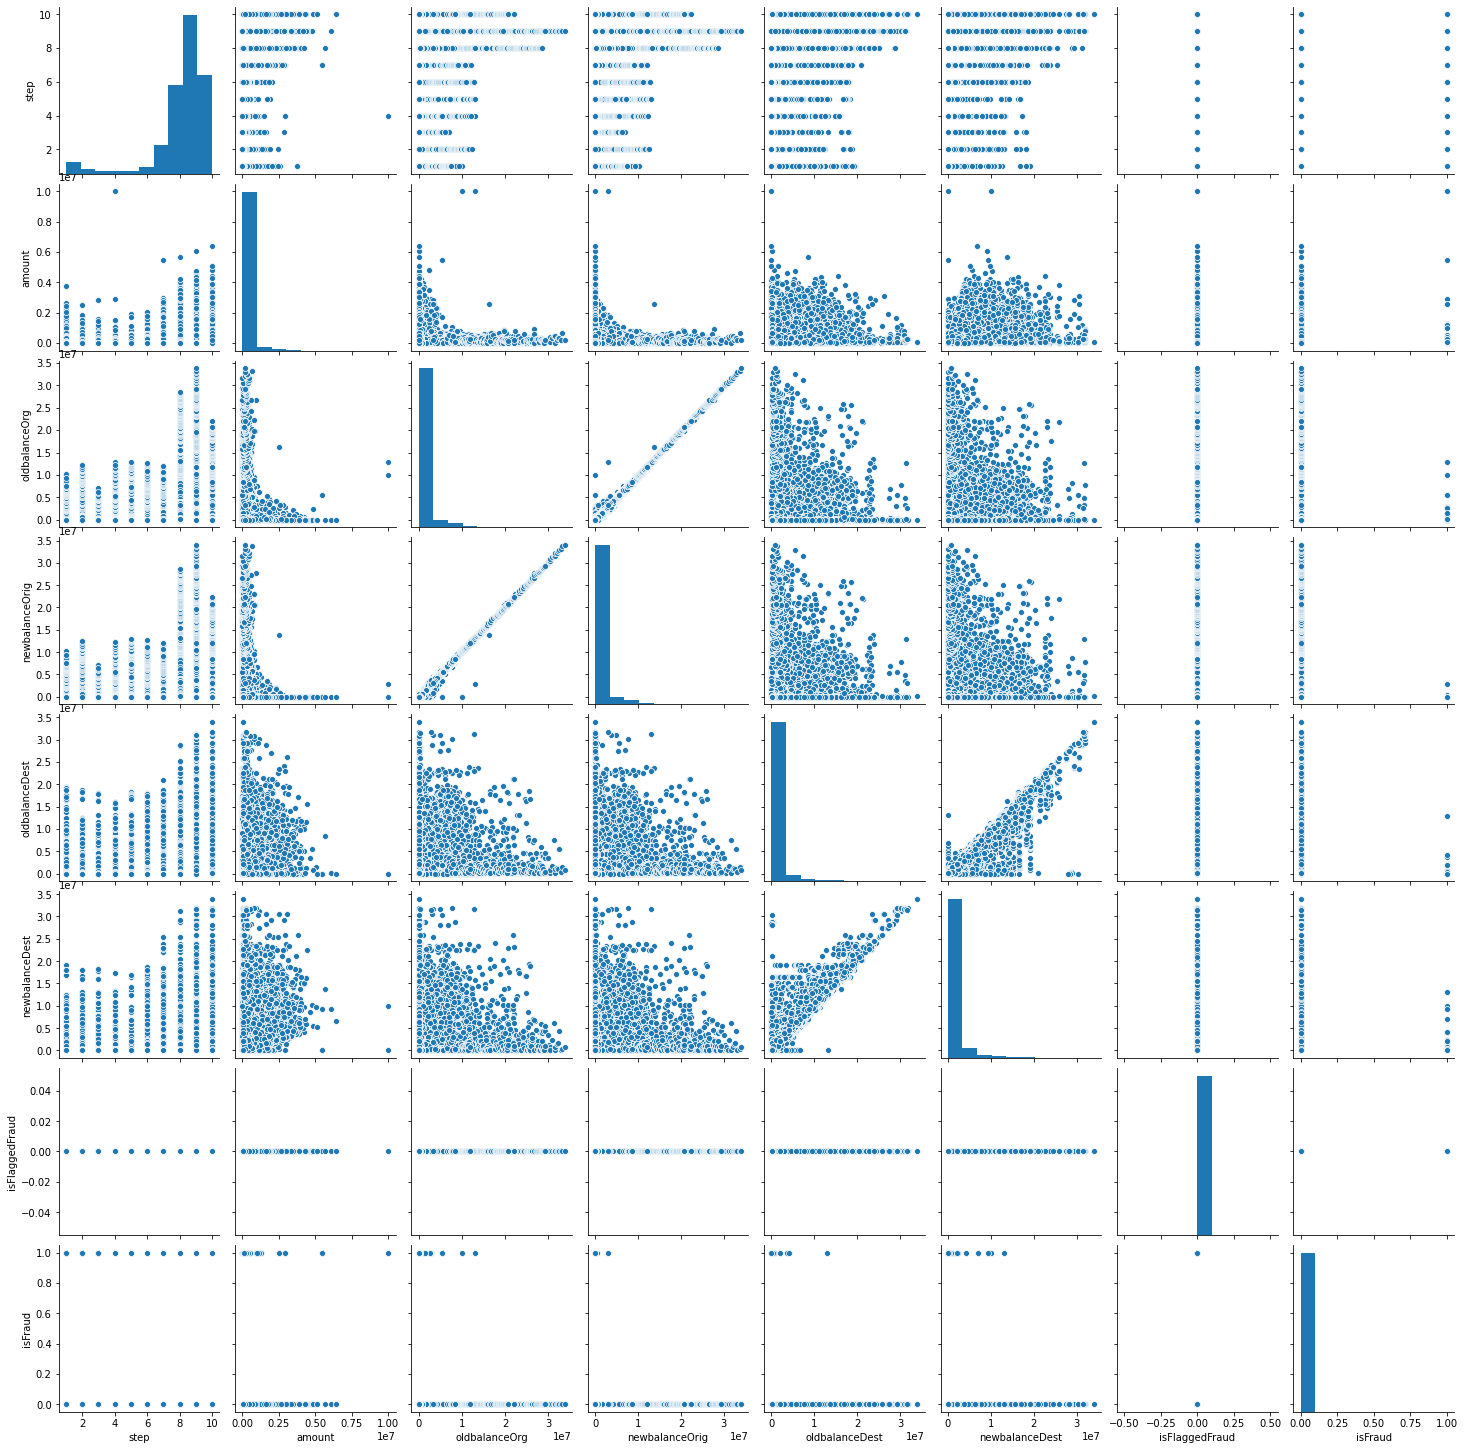

In [0]:
sns.pairplot(df[numeric_columns])
plt.show()

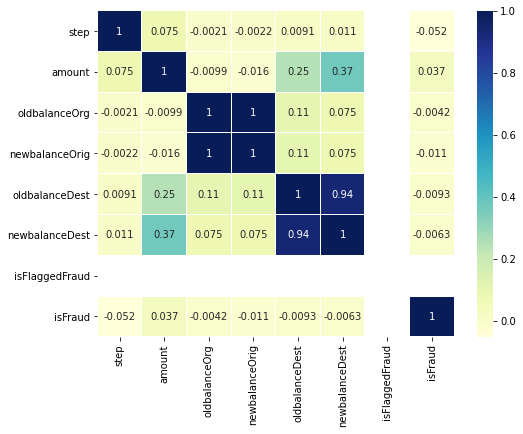

In [0]:
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='YlGnBu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f6ecff860>,
      dtype=object)

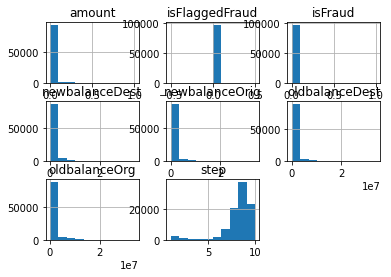

In [0]:
df[numeric_columns].hist()

In [0]:
df.groupby(['type','isFraud'])['isFraud'].count()

type      isFraud
CASH_IN   0.0        19380
CASH_OUT  0.0        29379
          1.0           58
DEBIT     0.0          967
PAYMENT   0.0        38114
TRANSFER  0.0         8221
          1.0           56
Name: isFraud, dtype: int64

In [0]:
df.type.value_counts()

PAYMENT     38114
CASH_OUT    29438
CASH_IN     19380
TRANSFER     8277
DEBIT         967
Name: type, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96176 entries, 0 to 96175
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            96176 non-null  int64  
 1   type            96176 non-null  object 
 2   amount          96176 non-null  float64
 3   nameOrig        96176 non-null  object 
 4   oldbalanceOrg   96176 non-null  float64
 5   newbalanceOrig  96175 non-null  float64
 6   nameDest        96175 non-null  object 
 7   oldbalanceDest  96175 non-null  float64
 8   newbalanceDest  96175 non-null  float64
 9   isFraud         96175 non-null  float64
 10  isFlaggedFraud  96175 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.1+ MB


In [0]:
df=df.drop(['step','isFlaggedFraud'], axis=1)

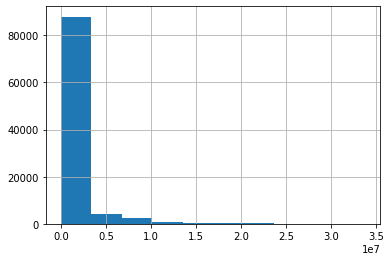

In [0]:
df['oldbalanceOrg'].hist()

In [0]:
df.loc[(df.isFraud==1)& (df.oldbalanceOrg<df.amount)].shape

(5, 9)

In [0]:
df = df.drop(df.loc[(df.isFraud==1)& (df.oldbalanceOrg<df.amount)].index)

In [0]:
df.loc[(df.isFraud==1)& (df.amount==0)].shape

(0, 9)

In [0]:
print('The fraud case with amount equals to zero = {}'. format(
    len(df.loc[(df.isFraud==1) & (df.amount==0)])))


 The fraud case with amount equals to zero = 0


In [0]:
print('The types of fraudulent transactions are {}'.format(
    list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [0]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

In [0]:
print('\n No.fraudulent in TRANSFERs = {}'.
      format(len(dfFraudTransfer)))


 No.fraudulent in TRANSFERs = 55


In [0]:
print('\n No.fraudulent in CASH_OUTs = {}'. 
      format(len(dfFraudCashout)))


 No.fraudulent in CASH_OUTs = 54


In [0]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [0]:
X = df.loc[(df.type == 'TRANSFER')]
X['Error_Orig']=X['oldbalanceOrg']-X['newbalanceOrig']-X['amount']
X['Error_Dest']=X['oldbalanceDest']-X['newbalanceDest']+X['amount']
y = X['isFraud']
X.drop("isFraud", axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [0]:
X.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,Error_Orig,Error_Dest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,0.00,181.00
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,-214605.30,237735.30
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,-300850.89,-2401220.00
58,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0.00,54744.51
78,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,-32349.00,76569.87


In [0]:
y.head()

2     1.0
19    0.0
24    0.0
58    0.0
78    0.0
Name: isFraud, dtype: float64

In [0]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,9.617100e+04,9.617100e+04,9.617000e+04,9.617000e+04,9.617000e+04,96170.000000
mean,1.720418e+05,8.833553e+05,8.997604e+05,8.784779e+05,1.181488e+06,0.001133
std,3.412313e+05,2.700930e+06,2.739018e+06,2.403208e+06,2.803613e+06,0.033647
min,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.864270e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,5.170100e+04,1.995700e+04,0.000000e+00,2.067950e+04,4.783916e+04,0.000000
75%,2.100658e+05,1.859435e+05,2.101203e+05,5.836399e+05,1.046767e+06,0.000000
max,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.397234e+07,1.000000


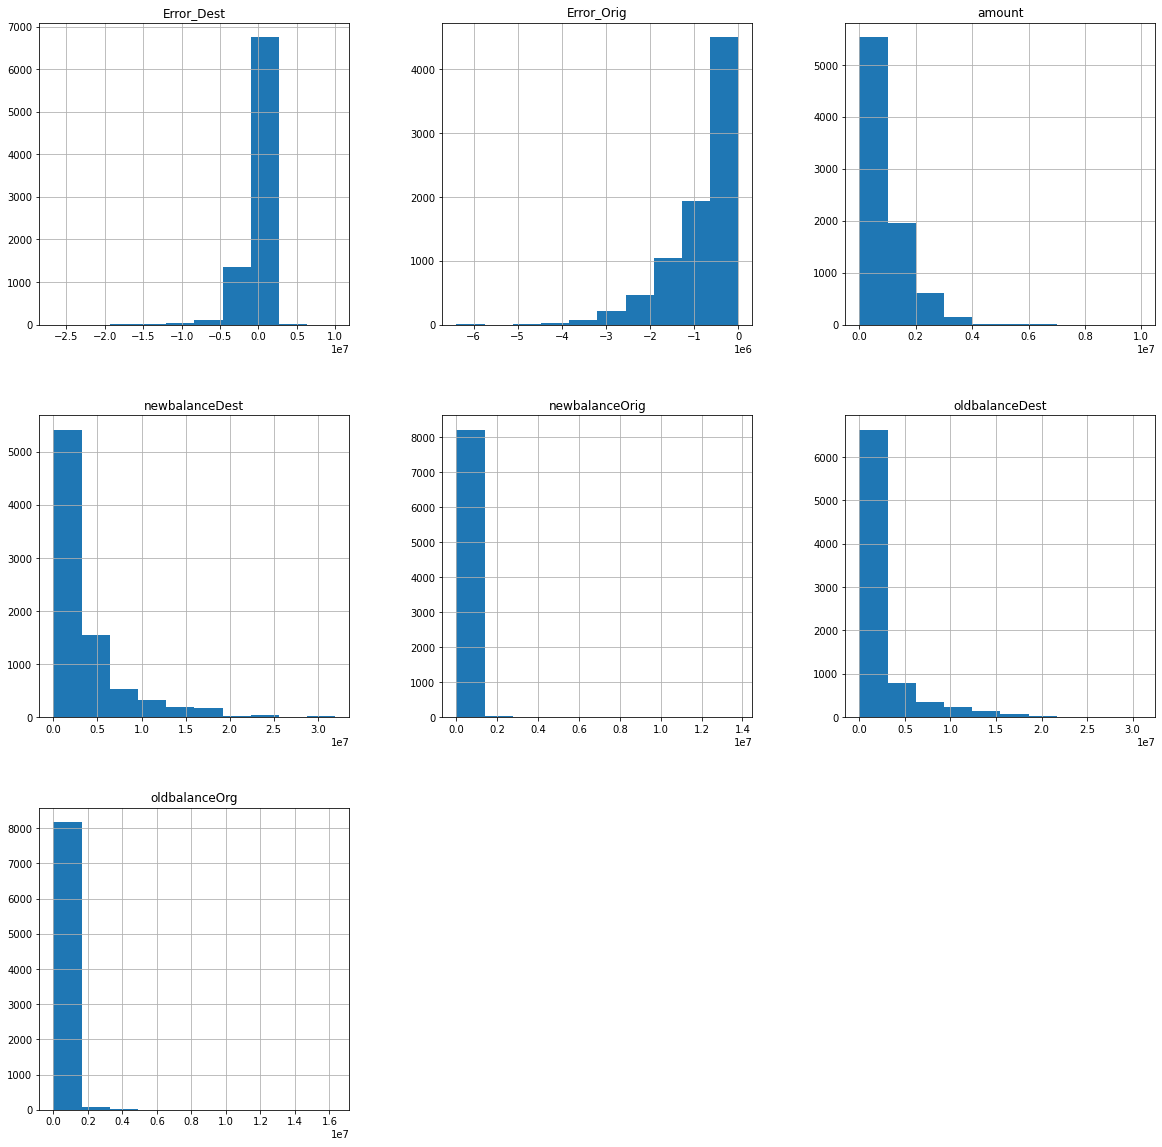

In [0]:
X.hist(figsize=(20,20))
plt.show()

In [0]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [0]:
X = X.drop(['nameOrig', 'nameDest', 'type'], axis=1)
print(X.head())
print(X.info())

       amount  oldbalanceOrg  ...  Error_Orig  Error_Dest
2      181.00         181.00  ...        0.00      181.00
19  215310.30         705.00  ...  -214605.30   237735.30
24  311685.89       10835.00  ...  -300850.89 -2401220.00
58   62610.80       79114.00  ...        0.00    54744.51
78   42712.39       10363.39  ...   -32349.00    76569.87

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8276 entries, 2 to 96164
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          8276 non-null   float64
 1   oldbalanceOrg   8276 non-null   float64
 2   newbalanceOrig  8276 non-null   float64
 3   oldbalanceDest  8276 non-null   float64
 4   newbalanceDest  8276 non-null   float64
 5   Error_Orig      8276 non-null   float64
 6   Error_Dest      8276 non-null   float64
dtypes: float64(7)
memory usage: 517.2 KB
None


In [0]:
print('error in the originates account history is {}'.format(len(X.loc[X.Error_Orig!=0])))

print('\nerror in the balance recipients history is {}'.format(len(X.loc[X.Error_Dest!=0])))

print('\nerror in both is {}'.format(len(X.loc[(X['Error_Orig']!=0) & (X['Error_Dest']!=0)])))

print('\nerror in both is {}'.format(len(X.loc[(X['Error_Orig']==0) & (X['Error_Dest']==0)])))

print('\n fraud without error in victim account is {}'.format(len(X.loc[(X['Error_Orig']==0) & (y==1)])))

print('\n OLD BALANCE PROBLEM in victim account is {}'.format(len(X.loc[(X['oldbalanceOrg']<X['amount'])])))

print('\n OLD BALANCE PROBLEM in victim account is {}'.format(len(X.loc[(X['oldbalanceOrg']==0) & (y==1)&(X['amount']==0)])))

print('\n OLD BALANCE PROBLEM in victim account is {}'.format(len(X.loc[(X['oldbalanceOrg']<X['amount'])&(y==1)])))

error in the originates account history is 8027

error in the balance recipients history is 7536

error in both is 7317

error in both is 30

 fraud without error in victim account is 54

 OLD BALANCE PROBLEM in victim account is 7771

 OLD BALANCE PROBLEM in victim account is 0

 OLD BALANCE PROBLEM in victim account is 0


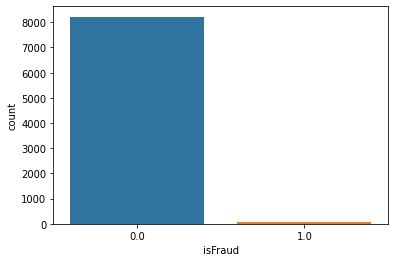

In [0]:
sns.countplot(y)

In [0]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


0.0    8221
1.0    8221
Name: 0, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
y_res[0].value_counts()

0.0    8221
1.0    8221
Name: 0, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                                    test_size=0.2, random_state=42, 
                                                    shuffle=True, stratify=y_res)

In [0]:
## logistic regression
clf = linear_model.LogisticRegression()

b = time()
clf.fit(X_train,y_train)
print('\n train time cost', time()- b)

b = time()
y_pred = clf.predict(X_test)
print('\n predict time cost', time()- b)

acc = accuracy_score(y_test, y_pred)
print('\n accuracy of decision tree result',acc)

print('\n confusion matrix of logistic regression:')
print(confusion_matrix(y_test, y_pred))

train time cost 0.18205738067626953

 predict time cost 0.0007424354553222656

 accuracy of decision tree result 0.9951352994831256

 confusion matrix of logistic regression:
[[1631   14]
 [   2 1642]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
## Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced")

b = time()
rf_clf.fit(X_train,y_train)
print('\n train time cost', time()- b)

b = time()
y_pred = rf_clf.predict(X_test)
print('\n predict time cost', time()- b)

acc = accuracy_score(y_test, y_pred)
print('accuracy of Random Forest Classifier result',acc)

print('\n confusion matrix of Random Forest Classifier:')
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



 train time cost 0.7504427433013916

 predict time cost 0.027776479721069336
accuracy of decision tree result 0.9990878686530861

 confusion matrix of logistic regression:
[[1642    3]
 [   0 1644]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
